In [9]:
%matplotlib inline
import torch
import numpy
import random
from torch.utils import data
from d2l import torch as d2l

## 构造数据集，生成数据集及其标签
$\mathbf y=\mathbf {Xw} + b + \epsilon$\
其中$\mathbf w = [2.7, -4.5], b = 5.8$

In [10]:
def synthetic_data(w, b, num_samples):
    X = torch.normal(0, 1, (num_samples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape(-1, 1)

## 处理数据集

In [17]:
def data_iter(features, labels, batch_size, shuffle=False):
    num_samples = len(features)
    indices = list(range(num_samples))
    if shuffle:
        random.shuffle(indices)
    for i in range(0, num_samples, batch_size):
        batch_indices = indices[i: min(i + batch_size, num_samples)]
        yield features[batch_indices], labels[batch_indices]

## 定义模型

In [12]:
def linear_model(X, w, b):
    return torch.matmul(X, w) + b

## 定义损失函数

In [13]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape((-1, 1))) ** 2 / 2

## 定义优化算法

In [14]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= param.grad * lr / batch_size
            param.grad.zero_()

## 训练

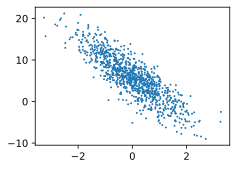

In [15]:
true_w = torch.tensor([2.7, -4.5])
true_b = torch.tensor([5.8])
features, labels = synthetic_data(true_w, true_b, 1000)
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [21]:
# 从零实现
lr = 0.01
batch_size = 16
num_epochs = 10
model = linear_model
w = torch.normal(0, 0.01, (2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
for epoch in range(num_epochs):
    for X, y in data_iter(features, labels, batch_size, True):
        y_hat = model(X, w, b)
        loss = squared_loss(y_hat, y)
        loss.sum().backward()
        sgd(params=[w, b], lr=lr, batch_size=batch_size)
    with torch.no_grad():
        y_hat = model(features, w, b)
        train_loss = squared_loss(y_hat, labels)
        print(f"epoch: {epoch}, train_loss: {train_loss.mean()}")
print(true_w, w)
print(true_b, b)

epoch: 0, train_loss: 8.766483306884766
epoch: 1, train_loss: 2.5653083324432373
epoch: 2, train_loss: 0.7507754564285278
epoch: 3, train_loss: 0.21987831592559814
epoch: 4, train_loss: 0.0644562765955925
epoch: 5, train_loss: 0.01892087794840336
epoch: 6, train_loss: 0.005583116319030523
epoch: 7, train_loss: 0.0016734322998672724
epoch: 8, train_loss: 0.0005252679693512619
epoch: 9, train_loss: 0.0001884552330011502
tensor([ 2.7000, -4.5000]) tensor([[ 2.6941],
        [-4.4887]], requires_grad=True)
tensor([5.8000]) tensor([5.7886], requires_grad=True)


In [22]:
# 使用pytorch实现
lr = 0.01
batch_size = 16
num_epochs = 10

train_set = data.TensorDataset(features, labels)
train_loader = data.DataLoader(train_set, batch_size, shuffle=True)
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1)
)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr)

for epoch in range(num_epochs):
    for X, y in train_set:
        y_hat = model(X)
        loss = loss_fn(y_hat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    with torch.no_grad():
        y_hat = model(features)
        train_loss = loss_fn(y_hat, labels)
        print(f"epoch: {epoch}, train_loss: {train_loss}")
print(true_w, model[0].weight.data)
print(true_b, model[0].bias.data)

epoch: 0, train_loss: 9.87075618468225e-05
epoch: 1, train_loss: 9.870747453533113e-05
epoch: 2, train_loss: 9.870747453533113e-05
epoch: 3, train_loss: 9.870747453533113e-05
epoch: 4, train_loss: 9.870747453533113e-05
epoch: 5, train_loss: 9.870747453533113e-05
epoch: 6, train_loss: 9.870747453533113e-05
epoch: 7, train_loss: 9.870747453533113e-05
epoch: 8, train_loss: 9.870747453533113e-05
epoch: 9, train_loss: 9.870747453533113e-05
tensor([ 2.7000, -4.5000]) tensor([[ 2.6993, -4.5008]])
tensor([5.8000]) tensor([5.7997])
